In [3]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
mnist = tf.keras.datasets.mnist



In [4]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 6s 1us/step


In [6]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


- Why do we divide by 255?

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
pd.Series(y_train).value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: count, dtype: int64

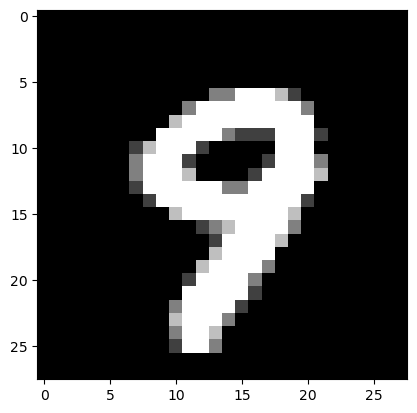

In [12]:
plt.imshow(x_train[5999], cmap=plt.get_cmap('gray'));

In [13]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])


2023-12-21 18:12:26.462569: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
tf.keras.utils.plot_model(model, "model.png",show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [17]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.8646954 ,  0.19305998, -0.637021  ,  0.4986056 , -0.6260493 ,
         0.17008644, -0.14374381, -0.8222152 ,  0.20922112, -0.279084  ]],
      dtype=float32)

In [18]:
tf.nn.softmax(predictions).numpy()

array([[0.2203021 , 0.11254626, 0.04907175, 0.1527664 , 0.04961311,
        0.10999015, 0.08036353, 0.04077582, 0.11437991, 0.07019102]],
      dtype=float32)

In [19]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [20]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3020 - accuracy: 0.9121
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1470 - accuracy: 0.9563
Epoch 3/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1100 - accuracy: 0.9665
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0884 - accuracy: 0.9728
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0785 - accuracy: 0.9758
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0682 - accuracy: 0.9785
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0601 - accuracy: 0.9808
Epoch 8/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0537 - accuracy: 0.9827
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0488 - accuracy: 0.9845
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.045

In [21]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0819 - accuracy: 0.9783 - 657ms/epoch - 2ms/step


[0.08186428248882294, 0.9782999753952026]

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


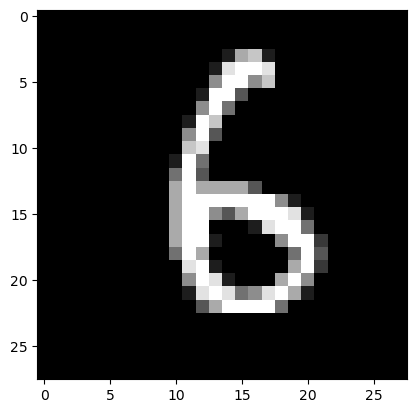

In [28]:
num = 3000
plt.imshow(x_test[num], cmap=plt.get_cmap('gray'))
print(np.round(tf.nn.softmax(model(x_test[num:num+1])).numpy(),1))

### Keras Functional API

In [29]:
parameters = {"shape":28, "activation": "relu", "classes": 10, "units":12, "optimizer":"adam", "epochs":1,"kernel_size":3,"pool_size":2, "dropout":0.5}

inputs = tf.keras.Input(shape=(parameters["shape"], parameters["shape"]))
flatten = tf.keras.layers.Flatten()(inputs)
dense = tf.keras.layers.Dense(128, activation='relu')(flatten)
dropout =  tf.keras.layers.Dropout(0.2)(dense)
outputs = tf.keras.layers.Dense(parameters["classes"], activation="softmax")(dropout)

In [30]:
model = tf.keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
tf.keras.utils.plot_model(model, "model.png",show_shapes=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [31]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history = model.fit(x_train, y_train, epochs=5)

test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/5


/Users/tevfikaytekin/miniforge3/envs/tf/lib/python3.9/site-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 5s 2ms/step - loss: 0.2929 - accuracy: 0.9145
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1506 - accuracy: 0.9568
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1191 - accuracy: 0.9656
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1031 - accuracy: 0.9699
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0918 - accuracy: 0.9735
313/313 - 0s - loss: 0.0855 - accuracy: 0.9753 - 477ms/epoch - 2ms/step
Test loss: 0.08551496267318726
Test accuracy: 0.9753000140190125


In [32]:
history.history

{'loss': [0.2929408848285675,
  0.1506367325782776,
  0.11910470575094223,
  0.1030973568558693,
  0.09178365767002106],
 'accuracy': [0.9144833087921143,
  0.956766664981842,
  0.9655666947364807,
  0.9699166417121887,
  0.9735000133514404]}

[[0.1 0.1 0.1 0.1 0.1 0.1 0.2 0.1 0.1 0.1]]


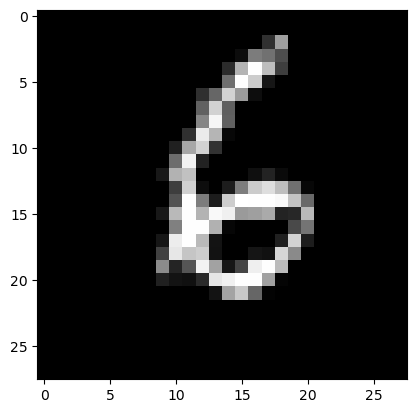

In [34]:
num = 2000
plt.imshow(x_test[num], cmap=plt.get_cmap('gray'))
print(np.round(tf.nn.softmax(model(x_test[num:num+1])).numpy(),1))